In [1]:
import os
"""
sets overrides the parent directory as current directory
"""
# Get the current directory path
current_directory = os.getcwd()

# Get the parent directory path
parent_directory = os.path.dirname(current_directory)

# Change the current directory to the parent directory
os.chdir(parent_directory)

# Verify the change
new_directory = os.getcwd()
print("New directory path:", new_directory)


# Now you can import modules from the parent directory
# from parent_module import my_function
from src.copperhead_processor import EventProcessor
from src.lib.get_parameters import getParametersForYr

import awkward as ak
import numpy as np
from omegaconf import OmegaConf
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import sys
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import numpy as np

New directory path: /work/users/yun79/valerie/fork/copperheadV2


/depot/cms/kernels/root632/lib/python3.12/site-packages/coffea/lookup_tools/evaluator.py:7: FutureWarning: In version 2024.8.0 (target date: 2024-07-31 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.lookup_tools.json_lookup will be removed by August 2024. Please use lumi_tools or correctionlib instead!.
  from coffea.lookup_tools.json_lookup import json_lookup
/work/users/yun79/valerie/fork/copperheadV2/src/copperhead_processor.py:20: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the fi

In [2]:
param_path = "./configs/parameters/"
config = getParametersForYr(param_path, "2018")
coffea_processor = EventProcessor(config, test_mode=True) # we assume that test_mode is True

In [34]:
def plotRelErr(rel_err, weights, var_name, sample):
    binning_map = {
        # "rel_err" : [1e-7, 0.001, 31],
        "rel_err" : [-7, -3, 31],
    }
    fig, ax_main = plt.subplots()
    # binning = np.linspace(*binning_map["rel_err"])
    binning = np.logspace(*binning_map["rel_err"])
    drop_zeros = rel_err != 0
    print(f"drop_zeros: {np.sum(drop_zeros)}")
    print(f"len(drop_zeros): {len(drop_zeros)}")
    rel_err = rel_err[drop_zeros]
    weights = weights[drop_zeros]
    # rel_err_hist, edges = np.histogram(rel_err, bins=binning, weights = weights)
    # rel_err_hist_w2, edges = np.histogram(rel_err, bins=binning, weights = weights*weights)
    rel_err_hist, edges = np.histogram(rel_err, bins=binning, )
    rel_err_hist_w2, edges = np.histogram(rel_err, bins=binning, )
    
        
    hep.histplot(
        rel_err_hist, 
        bins=binning, 
        histtype='errorbar', 
        label=f"{var_name}", 
        xerr=True, 
        yerr=np.sqrt(rel_err_hist_w2),
        color = "blue",
        ax=ax_main
    )
    
    ax_main.set_xlabel("Relative Error")
    ax_main.set_xscale('log')
    plt.title(f"Relative Error of {sample} {var_name}")
    plt.legend(loc="center right")
    plt.show()
    plt.clf()

dataset: dy_M-100To200
events.metadata: {'sumGenWgts': 7720081.838819998, 'nGenEvts': 2000000, 'data_entries': None, 'fraction': 1.0, 'original_fraction': 1.0, 'is_mc': True, 'dataset': 'dy_M-100To200', 'NanoAODv': 9, 'version': 'latest'}
NanoAODv: 9
doing rochester!
doing fsr!
doing geofit!
electron_id: mvaFall17V2Iso_WP90
small file test sumWeights: 6798350.261352539
muons mass_resolution dpt1: dask.awkward<multiply, npartitions=1>
prepare jets NanoAODv: 9
do jec!
cross_section: 254.2
doing musf!
doing LHE!
doing pdf!
jet loop matched_mu_pass b4 : dask.awkward<bitwise-and, npartitions=1>
doing jet puid weights!
sj_dict.keys(): dict_keys(['nsoftjets2_nominal', 'htsoft2_nominal', 'nsoftjets5_nominal', 'htsoft5_nominal'])
adding QGL weights!
doing btag wgt!
doing zpt weight!
weight statistics: dict_keys(['genWeight', 'genWeight_normalization', 'xsec', 'lumi', 'muID', 'muIso', 'muTrig', 'LHERen', 'LHEFac', 'pdf_2rms', 'jetpuid_wgt', 'qgl'])
adding btag wgts!
ERROR: not same array for fie

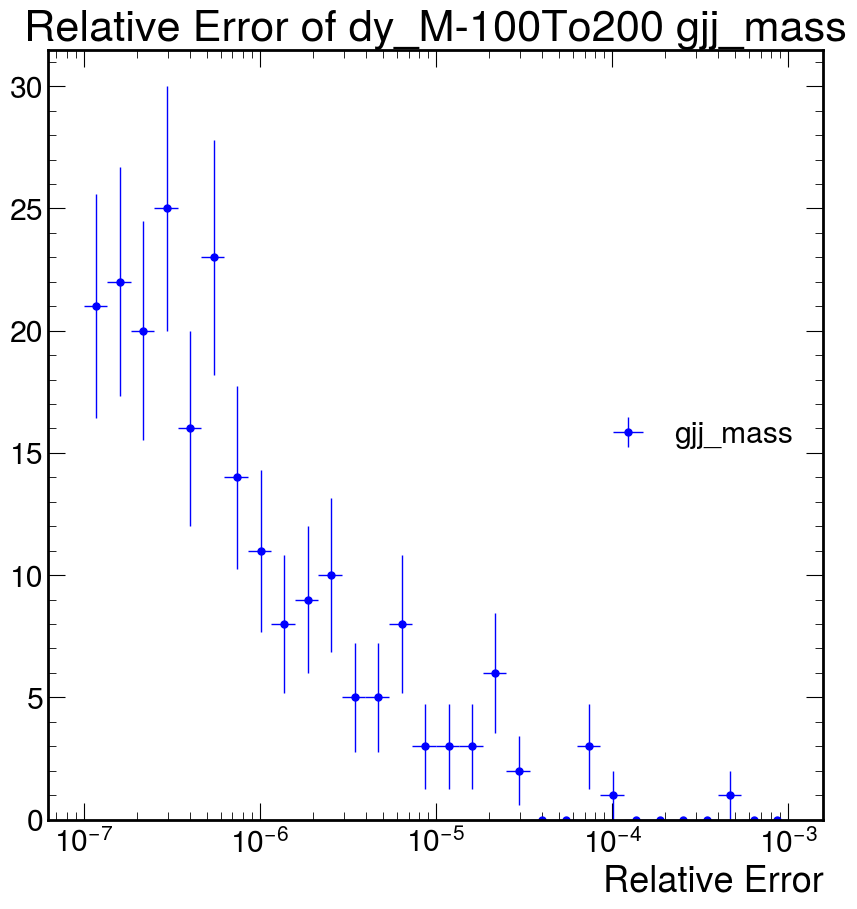

ERROR: not same array for field jj_mass!
drop_zeros: 174
len(drop_zeros): 1355


<Figure size 1000x1000 with 0 Axes>

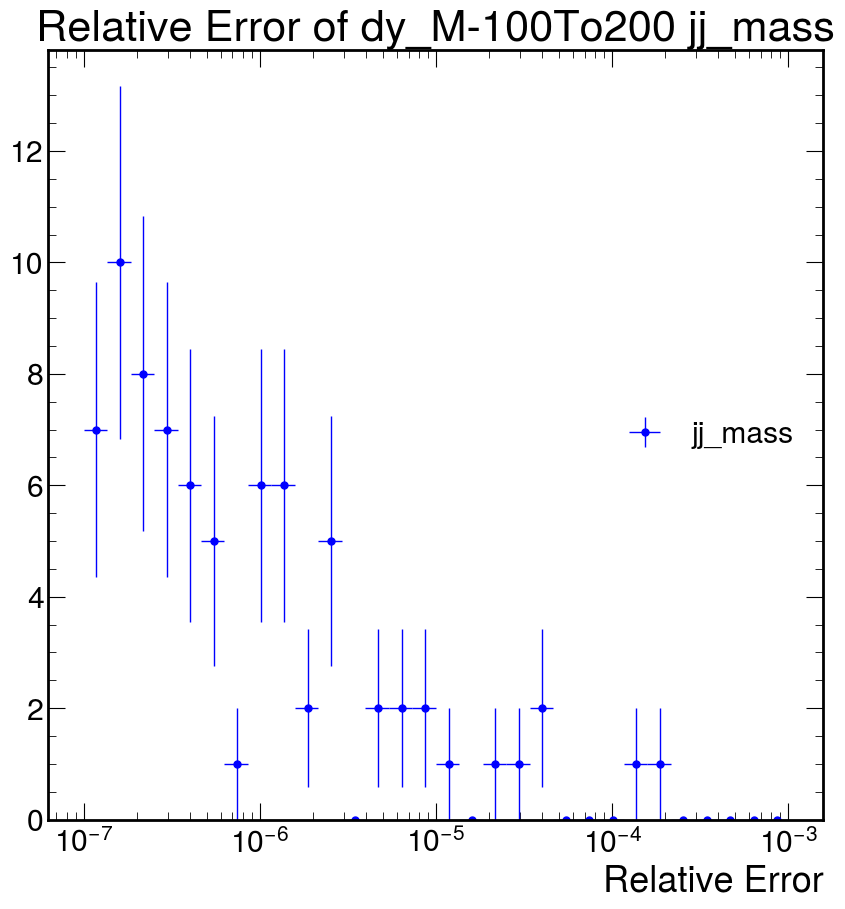

Success in dy_M-100To200!


/depot/cms/kernels/root632/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:247: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/depot/cms/kernels/root632/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:247: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


dataset: vbf_powheg
events.metadata: {'sumGenWgts': 7720081.838819998, 'nGenEvts': 2000000, 'data_entries': None, 'fraction': 1.0, 'original_fraction': 1.0, 'is_mc': True, 'dataset': 'vbf_powheg', 'NanoAODv': 9, 'version': 'latest'}
NanoAODv: 9
doing rochester!


/depot/cms/kernels/root632/lib/python3.12/site-packages/dask_awkward/lib/structure.py:907: UserWarning: Please ensure that dask.awkward<dask, npartitions=1>
        is partitionwise-compatible with dask.awkward<dask, npartitions=1>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


doing fsr!
doing geofit!
electron_id: mvaFall17V2Iso_WP90
small file test sumWeights: 38767.655119895935
muons mass_resolution dpt1: dask.awkward<multiply, npartitions=1>
prepare jets NanoAODv: 9
do jec!
cross_section: 0.0008210722
doing musf!
doing LHE!
doing pdf!
jet loop matched_mu_pass b4 : dask.awkward<bitwise-and, npartitions=1>
doing jet puid weights!
sj_dict.keys(): dict_keys(['nsoftjets2_nominal', 'htsoft2_nominal', 'nsoftjets5_nominal', 'htsoft5_nominal'])
adding QGL weights!
doing btag wgt!
weight statistics: dict_keys(['genWeight', 'genWeight_normalization', 'xsec', 'lumi', 'muID', 'muIso', 'muTrig', 'LHERen', 'LHEFac', 'pdf_2rms', 'jetpuid_wgt', 'qgl'])
adding btag wgts!
ERROR: not same array for field gjj_mass!
drop_zeros: 4568
len(drop_zeros): 6485


<Figure size 1000x1000 with 0 Axes>

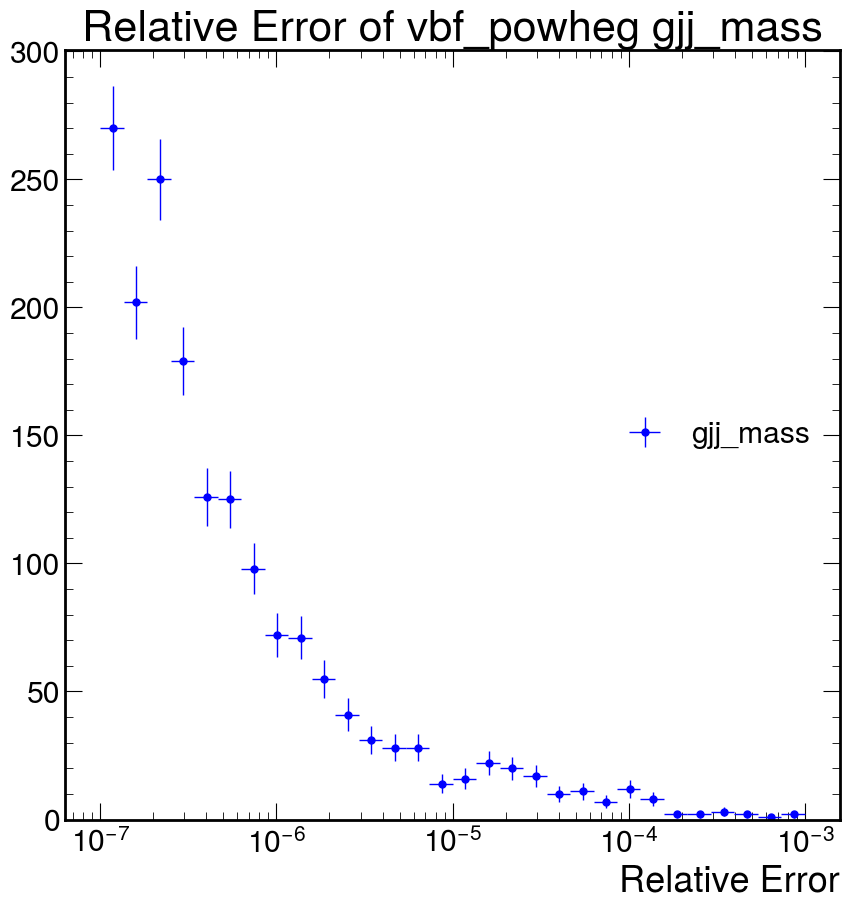

ERROR: not same array for field jj_mass!
drop_zeros: 2941
len(drop_zeros): 6485


<Figure size 1000x1000 with 0 Axes>

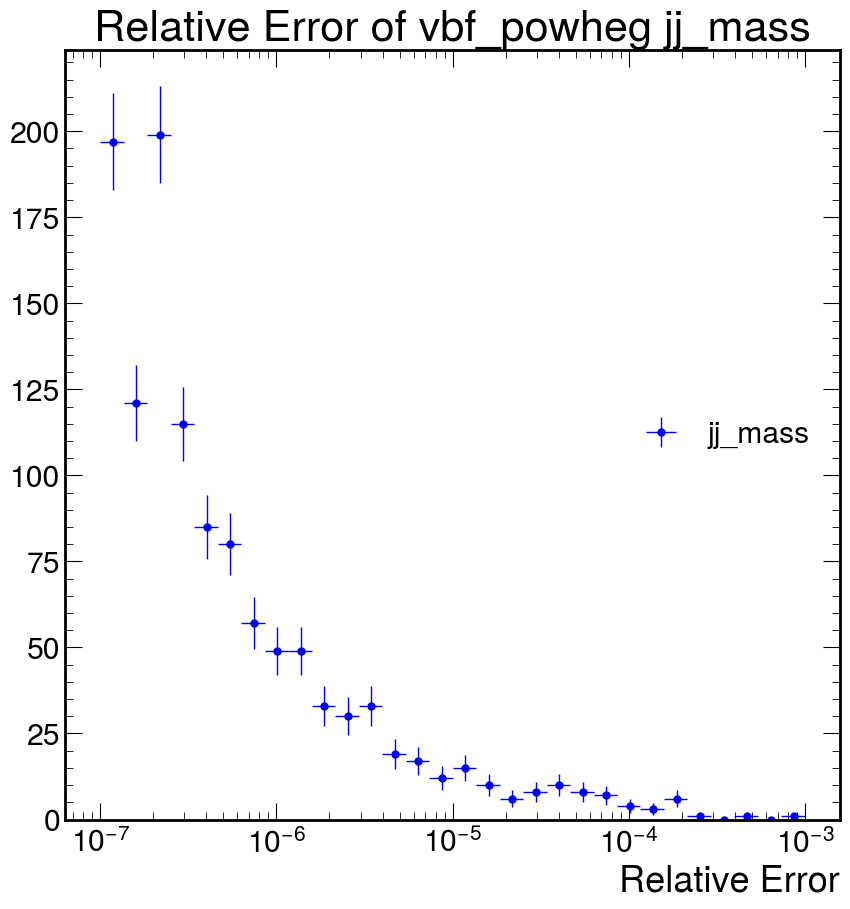

ERROR: not same array for field mmjj_pt!
ERROR: not same array for field mmjj_phi!
drop_zeros: 4249
len(drop_zeros): 6485


<Figure size 1000x1000 with 0 Axes>

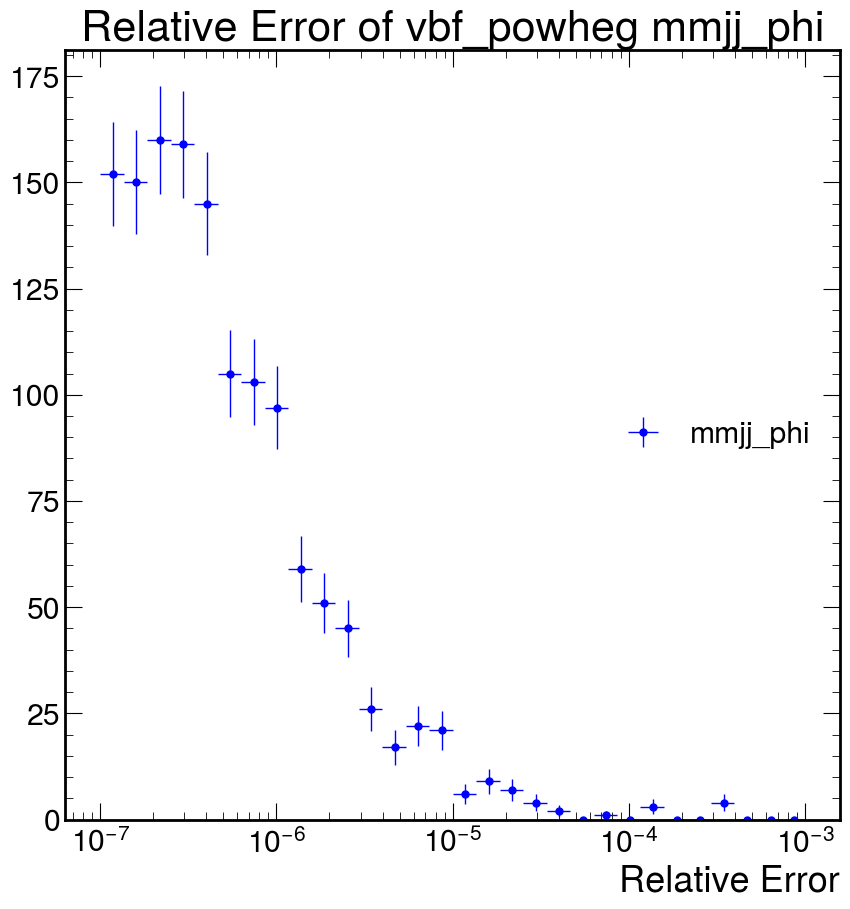

ERROR: not same array for field mmjj_mass!
Success in vbf_powheg!


/depot/cms/kernels/root632/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:247: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/depot/cms/kernels/root632/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:247: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


dataset: ggh_powheg
events.metadata: {'sumGenWgts': 7720081.838819998, 'nGenEvts': 2000000, 'data_entries': None, 'fraction': 1.0, 'original_fraction': 1.0, 'is_mc': True, 'dataset': 'ggh_powheg', 'NanoAODv': 9, 'version': 'latest'}
NanoAODv: 9
doing rochester!


/depot/cms/kernels/root632/lib/python3.12/site-packages/dask_awkward/lib/structure.py:907: UserWarning: Please ensure that dask.awkward<dask, npartitions=1>
        is partitionwise-compatible with dask.awkward<dask, npartitions=1>
        (e.g. counts comes from a dak.num(array, axis=1)),
        otherwise this unflatten operation will fail when computed!
  warnings.warn(


doing fsr!
doing geofit!
electron_id: mvaFall17V2Iso_WP90
small file test sumWeights: 214395.9242362976
muons mass_resolution dpt1: dask.awkward<multiply, npartitions=1>
prepare jets NanoAODv: 9
do jec!
cross_section: 0.01057
doing NNLOPS!
doing musf!
doing LHE!
doing pdf!
jet loop matched_mu_pass b4 : dask.awkward<bitwise-and, npartitions=1>
doing jet puid weights!
sj_dict.keys(): dict_keys(['nsoftjets2_nominal', 'htsoft2_nominal', 'nsoftjets5_nominal', 'htsoft5_nominal'])
adding QGL weights!
doing btag wgt!
weight statistics: dict_keys(['genWeight', 'genWeight_normalization', 'xsec', 'lumi', 'nnlops', 'muID', 'muIso', 'muTrig', 'LHERen', 'LHEFac', 'pdf_2rms', 'jetpuid_wgt', 'qgl'])
adding btag wgts!
ERROR: not same array for field gjj_mass!
drop_zeros: 2826
len(drop_zeros): 6271


<Figure size 1000x1000 with 0 Axes>

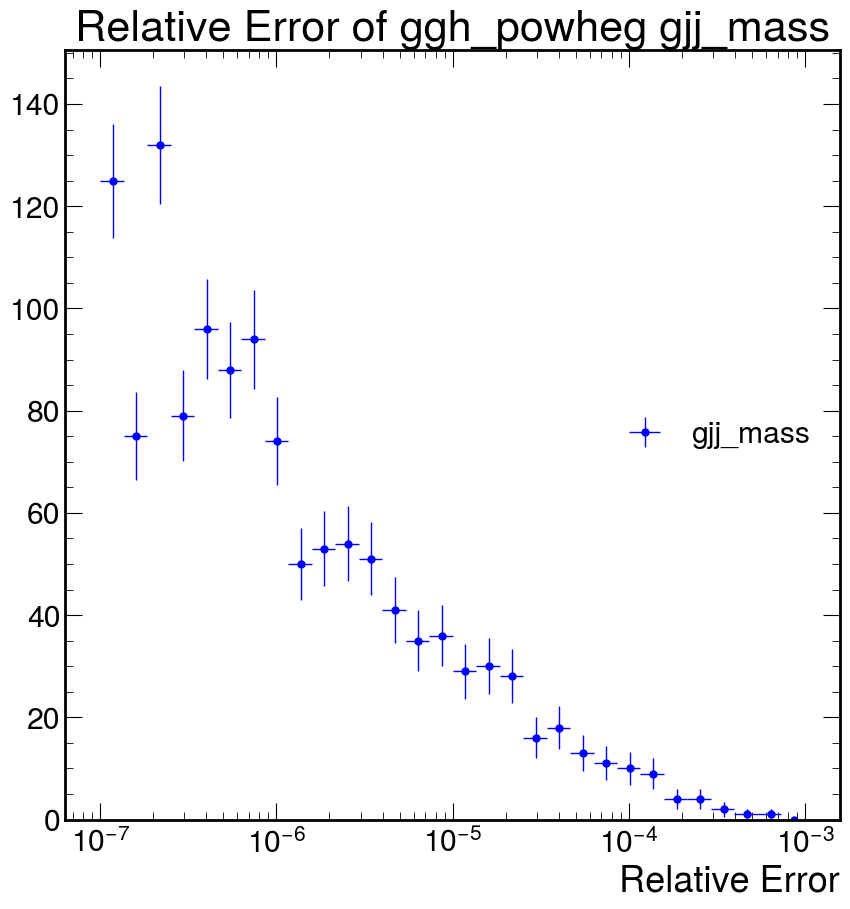

ERROR: not same array for field jj_mass!
drop_zeros: 835
len(drop_zeros): 6271


<Figure size 1000x1000 with 0 Axes>

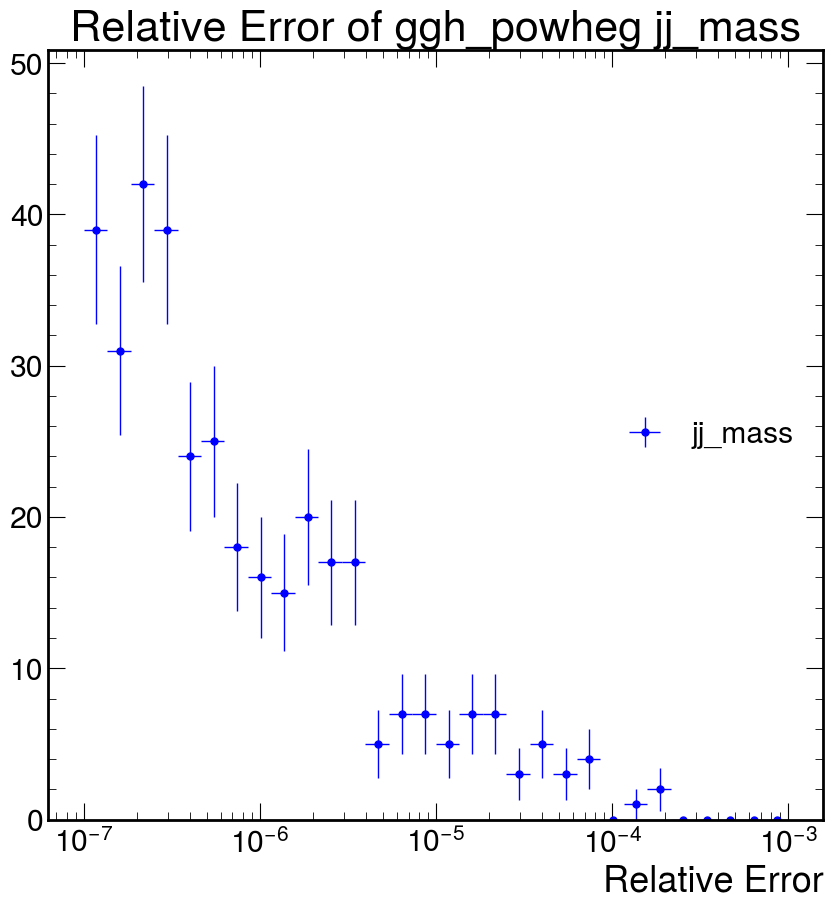

Success in ggh_powheg!


/depot/cms/kernels/root632/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:247: RuntimeWarning: Missing cross-reference index for LowPtElectron_electronIdx => Electron
  warnings.warn(
/depot/cms/kernels/root632/lib/python3.12/site-packages/coffea/nanoevents/schemas/nanoaod.py:247: RuntimeWarning: Missing cross-reference index for LowPtElectron_photonIdx => Photon
  warnings.warn(


dataset: data_A
events.metadata: {'sumGenWgts': 7720081.838819998, 'nGenEvts': 2000000, 'data_entries': None, 'fraction': 1.0, 'original_fraction': 1.0, 'is_mc': False, 'dataset': 'data_A', 'NanoAODv': 9, 'version': 'latest'}
NanoAODv: 9
doing rochester!
doing fsr!
doing geofit!
electron_id: mvaFall17V2Iso_WP90
muons mass_resolution dpt1: dask.awkward<multiply, npartitions=1>
prepare jets NanoAODv: 9
do jec!
jet loop matched_mu_pass b4 : dask.awkward<bitwise-and, npartitions=1>
sj_dict.keys(): dict_keys(['nsoftjets2_nominal', 'htsoft2_nominal', 'nsoftjets5_nominal', 'htsoft5_nominal'])
weight statistics: dict_keys(['ones'])
ERROR: not same array for field jj_mass!
Success in data_A!


<Figure size 1000x1000 with 0 Axes>

In [36]:
np.set_printoptions(threshold=sys.maxsize)

samples = [
    "dy_M-100To200", 
    "vbf_powheg",
    "ggh_powheg", 
    "data_A",
]
for sample in samples:
    load_path = f"./test/stage1_inputs/{sample}"
    
    dataset_dict = OmegaConf.load(load_path + "/dataset_dict.yaml")
    dataset_dict = OmegaConf.to_object(dataset_dict) # convert to normal dictionary, which may not be necessary, but oh well
    events = NanoEventsFactory.from_root(
        dataset_dict["files"],
        schemaclass=NanoAODSchema,
        metadata= dataset_dict["metadata"],
        uproot_options={
            "timeout":2400,
        },
    ).events()
    out_collections = coffea_processor.process(events)
    out_collections = ak.zip(out_collections, depth_limit=1).compute()

    load_path = f"./test/stage1_outputs/{sample}"
    target_out = ak.from_parquet(load_path+"/part0.parquet")
    for field in target_out.fields:
        target_arr = ak.to_numpy(ak.fill_none(target_out[field], -99.0))
        out_arr = ak.to_numpy(ak.fill_none(out_collections[field], -99.0))
        # print(f"len(target_arr): {len(target_arr)}")
        # print(f"len(out_arr): {len(out_arr)}")
        is_same_arr = np.all(np.isclose(target_arr,out_arr, atol=1e-05))
        # is_same_arr = ak.all(ak.isclose(target_arr,out_arr))
        if not is_same_arr:
            print(f"ERROR: not same array for field {field}!")
            # print(f"target_arr: {target_arr}")
            # print(f"out_arr: {out_arr}")
            rel_err = (target_arr-out_arr)/target_arr
            
            # print(f"rel err: {rel_err}")
            # # print(f"rel err max: {np.max(rel_err)}")
            # # print(f"rel err mean: {np.mean(rel_err)}")
            # argmax = np.argmax(rel_err)
            # # print(f"target_arr argmax: {target_arr[argmax]}")
            # # print(f"out_arr argmax: {out_arr[argmax]}")
            # bigErr_filter = rel_err > 1e-3
            # print(f"N events with big errors: {np.sum(bigErr_filter)}")
            max_err = np.max(rel_err)
            if max_err > 1e-4:
                wgt = ak.to_numpy(ak.fill_none(target_out["wgt_nominal_total"], -99.0))
                plotRelErr(rel_err, wgt, field, sample)
            # raise ValueError
            

            
    print(f"Success in {sample}!")

drop_zeros: 174
len(drop_zeros): 1355


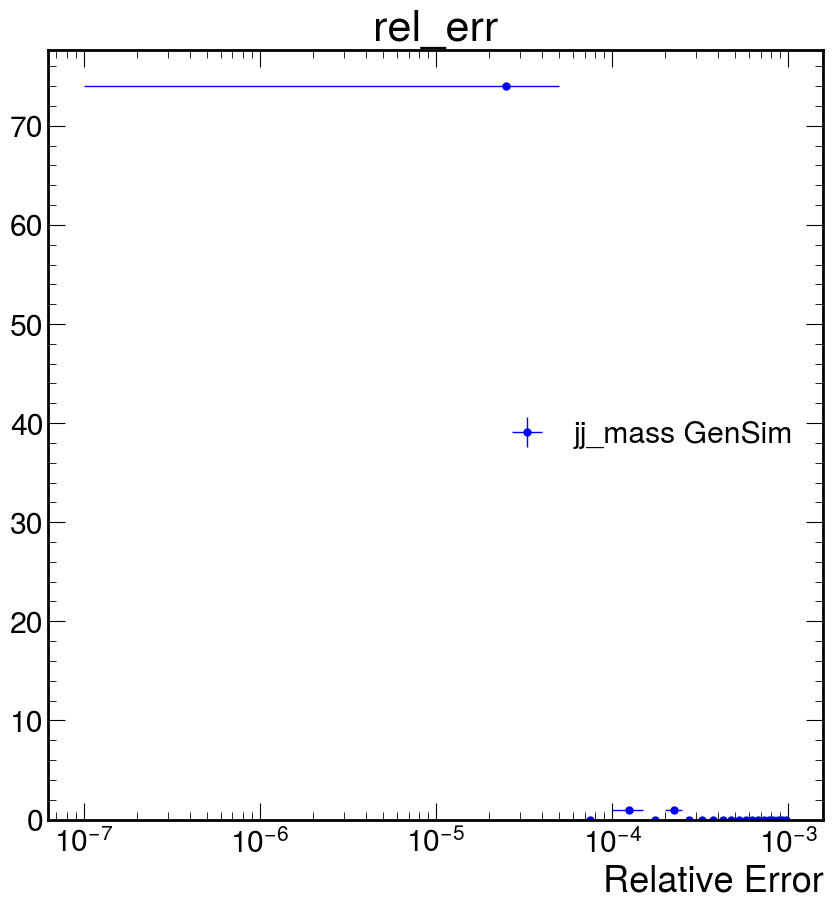

In [15]:


binning_map = {
    "rel_err" : [1e-7, 0.001, 21],
}
fig, ax_main = plt.subplots()
binning = np.linspace(*binning_map["rel_err"])
drop_zeros = rel_err != 0
print(f"drop_zeros: {np.sum(drop_zeros)}")
print(f"len(drop_zeros): {len(drop_zeros)}")
rel_err_hist, edges = np.histogram(rel_err[drop_zeros], bins=binning)

    
hep.histplot(
    rel_err_hist, 
    bins=binning, 
     histtype='errorbar', 
    label=f"", 
     xerr=True, 
     yerr=0,
    color = "blue",
    ax=ax_main
)

ax_main.set_xlabel("Relative Error")
ax_main.set_xscale('log')
plt.title(f"rel_err")
plt.legend(loc="center right")
plt.show()
plt.clf()

In [29]:
# binning = np.linspace(*binning_map["rel_err"])
binning = np.logspace(-7, -3, 31)
binning

array([1.00000000e-07, 1.35935639e-07, 1.84784980e-07, 2.51188643e-07,
       3.41454887e-07, 4.64158883e-07, 6.30957344e-07, 8.57695899e-07,
       1.16591440e-06, 1.58489319e-06, 2.15443469e-06, 2.92864456e-06,
       3.98107171e-06, 5.41169527e-06, 7.35642254e-06, 1.00000000e-05,
       1.35935639e-05, 1.84784980e-05, 2.51188643e-05, 3.41454887e-05,
       4.64158883e-05, 6.30957344e-05, 8.57695899e-05, 1.16591440e-04,
       1.58489319e-04, 2.15443469e-04, 2.92864456e-04, 3.98107171e-04,
       5.41169527e-04, 7.35642254e-04, 1.00000000e-03])